In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/PlantVillage/PlantVillage.zip'

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/val/Soybean___healthy/55ed6b1f-9baf-45d9-b4b4-4f19c7dc271a___RS_HL 7312.JPG  
  inflating: PlantVillage/val/Soybean___healthy/561d3eaf-4ff0-4580-9958-55494bf3a88b___RS_HL 6420.JPG  
  inflating: PlantVillage/val/Soybean___healthy/56486310-1cd5-4fb4-9fb8-01f60417f64f___RS_HL 6258.JPG  
  inflating: PlantVillage/val/Soybean___healthy/56a8722c-1acf-4f63-ba8c-66df35f47791___RS_HL 6311.JPG  
  inflating: PlantVillage/val/Soybean___healthy/5735f9f8-b5a4-42b4-b093-1e323323dfa2___RS_HL 3224.JPG  
  inflating: PlantVillage/val/Soybean___healthy/5755b898-21db-4c7f-8d5a-3401e8478192___RS_HL 4530.JPG  
  inflating: PlantVillage/val/Soybean___healthy/578f7dd6-55ae-4fb3-8f79-3ee460250ea7___RS_HL 2784.JPG  
  inflating: PlantVillage/val/Soybean___healthy/57afa416-2cfd-49d0-9674-e59b7955648c___RS_HL 3367.JPG  
  inflating: PlantVillage/val/Soybean___healthy/57bac195-757a-4570-91fd-0da80dedc800___RS_HL 6641.JPG  
  inflating: 

In [ ]:
import shutil

shutil.rmtree('/content/PlantVillage/train/background')
shutil.rmtree('/content/PlantVillage/val/background')

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import ipywidgets as widgets
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import seaborn as sns

In [ ]:
data_dir = ('/content/PlantVillage/train')
categories = ['Apple___Apple_scab', 
                'Apple___Black_rot', 
                'Apple___Cedar_apple_rust',
                'Apple___healthy', 
                'Blueberry___healthy', 
                'Cherry_(including_sour)___Powdery_mildew', 
                'Cherry_(including_sour)___healthy',
                'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 
                'Corn_(maize)___Common_rust_', 
                'Corn_(maize)___Northern_Leaf_Blight',
                'Corn_(maize)___healthy', 
                'Grape___Black_rot',
                'Grape___Esca_(Black_Measles)',
                'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                'Grape___healthy',
                'Orange___Haunglongbing_(Citrus_greening)',
                'Peach___Bacterial_spot',
                'Peach___healthy',
                'Pepper,_bell___Bacterial_spot',
                'Pepper,_bell___healthy',
                'Potato___Early_blight',
                'Potato___Late_blight',
                'Potato___healthy',
                'Raspberry___healthy',
                'Soybean___healthy', 
                'Squash___Powdery_mildew',
                'Strawberry___Leaf_scorch',
                'Strawberry___healthy',
                'Tomato___Bacterial_spot',
                'Tomato___Early_blight',
                'Tomato___Late_blight',
                'Tomato___Leaf_Mold',
                'Tomato___Septoria_leaf_spot',
                'Tomato___Spider_mites Two-spotted_spider_mite', 
                'Tomato___Target_Spot',
                'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
                'Tomato___Tomato_mosaic_virus',
                'Tomato___healthy'
              ]

In [ ]:
data_dir = ('/content/PlantVillage/train')
categories = ['Apple___Apple_scab', 
                'Apple___Black_rot', 
                'Apple___Cedar_apple_rust',
                'Apple___healthy', 
                'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 
                'Corn_(maize)___Common_rust_', 
                'Corn_(maize)___Northern_Leaf_Blight',
                'Corn_(maize)___healthy', 
                'Tomato___Bacterial_spot',
                'Tomato___Early_blight',
                'Tomato___Late_blight',
                'Tomato___Leaf_Mold',
                'Tomato___Septoria_leaf_spot',
                'Tomato___Spider_mites Two-spotted_spider_mite', 
                'Tomato___Target_Spot',
                'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
                'Tomato___Tomato_mosaic_virus',
                'Tomato___healthy'
              ]

In [ ]:
data_dir = ('/content/PlantVillage/train')
categories = ['Apple___Apple_scab', 
                'Apple___Black_rot', 
                'Apple___Cedar_apple_rust',
                'Apple___healthy'
              ]

In [ ]:
train_images = []
train_labels = [] 
for i in categories:
    path = os.path.join(data_dir, i)
    for img_path in os.listdir(path):
      img = cv2.imread(path +'/'+ img_path)       
      img = cv2.resize(img, (64, 64))
      img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
      #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      train_images.append(img)
      train_labels.append(i)
train_images = np.array(train_images)
#train_images = train_images.reshape(5787, 64, 64, 1)
train_labels = np.array(train_labels)

In [ ]:
label_to_id = {v:i for i,v in enumerate(np.unique(train_labels))}
id_to_label = {v: k for k, v in label_to_id.items()}
train_label_ids = np.array([label_to_id[x] for x in train_labels])

In [ ]:
train_images.shape, train_label_ids.shape, train_labels.shape

((2536, 64, 64, 3), (2536,), (2536,))

In [ ]:
test_images = []
test_labels = [] 
data_dir = ('/content/PlantVillage/val')

for i in categories:
    path = os.path.join(data_dir, i)
    for img_path in os.listdir(path):
      img = cv2.imread(path +'/'+ img_path)       
      img = cv2.resize(img, (64, 64))
      img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
      #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      test_images.append(img)
      test_labels.append(i)
test_images = np.array(test_images)
#test_images = test_images.reshape(1446, 64, 64, 1)
test_labels = np.array(test_labels)

In [ ]:
test_label_ids = np.array([label_to_id[x] for x in test_labels])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
test_labels, test_labels_encoded

(array(['Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
        'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
        'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
        'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
        'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
        'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
        'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
        'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
        'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
        'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
        'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
        'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
        'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
        'Apple___Apple_scab', 'Apple__

In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(2536, 64, 64, 3) (2536,) (635, 64, 64, 3) (635,)


In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(2536, 64, 64, 3) (2536,) (635, 64, 64, 3) (635,)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_valid = keras.utils.to_categorical(y_test)
y_test_one_hot = keras.utils.to_categorical(y_test)

In [ ]:
y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
#np.set_printoptions(threshold=np.inf)
y_test_one_hot

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
import keras.backend as K
import tensorflow as tf
from keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Input
from keras.models import Model

# **Multilayer Dense Autoencoder**

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])

In [ ]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [ ]:
x_train.shape, x_test.shape

((2536, 12288), (635, 12288))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
t = MinMaxScaler()
t.fit(x_train)
X_train = t.transform(x_train)
X_test = t.transform(x_test)

In [ ]:
n_inputs=12288

In [ ]:
# define encoder
visible = Input(shape=(12288,))
# encoder level 1
e = Dense(256)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
'''e = Dense(256*0.75)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)'''

e = Dense(256*0.5)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 256*0.25
bottleneck = Dense(n_bottleneck)(e)

In [ ]:
# define decoder, level 1
d = Dense(256*0.5)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

'''d = Dense(256*0.75)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)'''
# decoder level 2
d = Dense(256)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='sigmoid')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model.compile(loss='mse', optimizer = optimizer,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12288)]           0         
                                                                 
 dense (Dense)               (None, 256)               3145984   
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                             

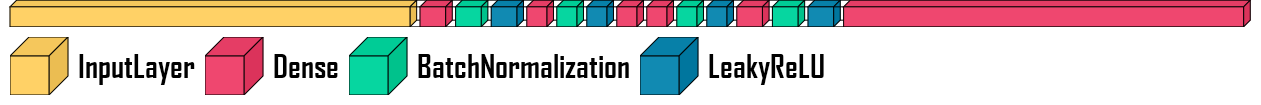

In [ ]:
#!pip install visualkeras
import visualkeras
from PIL import ImageFont

font = ImageFont.truetype("/content/AGENCYB.TTF", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font, to_file='output.png')
#visualkeras.layered_view(model_ae, to_file='output.png')

In [ ]:
history = model.fit(X_train, X_train, epochs=100, batch_size=16, verbose=1, validation_data=(X_test,X_test)) 
#new Date: 24/07/2022

Epoch 1/100
159/159 [==============================] - 3s 11ms/step - loss: 0.0203 - accuracy: 3.9432e-04 - val_loss: 0.0439 - val_accuracy: 0.0000e+00
Epoch 2/100
159/159 [==============================] - 1s 8ms/step - loss: 0.0158 - accuracy: 0.0032 - val_loss: 0.0215 - val_accuracy: 0.0047
Epoch 3/100
159/159 [==============================] - 1s 8ms/step - loss: 0.0146 - accuracy: 0.0039 - val_loss: 0.0153 - val_accuracy: 0.0016
Epoch 4/100
159/159 [==============================] - 1s 8ms/step - loss: 0.0140 - accuracy: 0.0020 - val_loss: 0.0165 - val_accuracy: 0.0016
Epoch 5/100
159/159 [==============================] - 1s 8ms/step - loss: 0.0134 - accuracy: 0.0024 - val_loss: 0.0132 - val_accuracy: 0.0031
Epoch 6/100
159/159 [==============================] - 1s 9ms/step - loss: 0.0131 - accuracy: 0.0020 - val_loss: 0.0130 - val_accuracy: 0.0063
Epoch 7/100
159/159 [==============================] - 1s 9ms/step - loss: 0.0128 - accuracy: 0.0032 - val_loss: 0.0140 - val_accurac

In [ ]:
history = model.fit(X_train, X_train, epochs=100, batch_size=16, verbose=1, validation_data=(X_test,X_test)) 
#new Date: 24/07/2022

Epoch 1/100
159/159 [==============================] - 4s 14ms/step - loss: 0.0206 - accuracy: 0.0020 - val_loss: 0.0530 - val_accuracy: 0.0000e+00
Epoch 2/100
159/159 [==============================] - 2s 12ms/step - loss: 0.0159 - accuracy: 0.0035 - val_loss: 0.0239 - val_accuracy: 0.0031
Epoch 3/100
159/159 [==============================] - 1s 8ms/step - loss: 0.0148 - accuracy: 0.0032 - val_loss: 0.0168 - val_accuracy: 0.0047
Epoch 4/100
159/159 [==============================] - 1s 8ms/step - loss: 0.0140 - accuracy: 0.0051 - val_loss: 0.0142 - val_accuracy: 0.0047
Epoch 5/100
159/159 [==============================] - 1s 8ms/step - loss: 0.0135 - accuracy: 0.0028 - val_loss: 0.0131 - val_accuracy: 0.0016
Epoch 6/100
159/159 [==============================] - 1s 8ms/step - loss: 0.0132 - accuracy: 0.0032 - val_loss: 0.0128 - val_accuracy: 0.0031
Epoch 7/100
159/159 [==============================] - 1s 9ms/step - loss: 0.0127 - accuracy: 0.0039 - val_loss: 0.0122 - val_accuracy: 

In [ ]:
model.evaluate(X_train, X_train)
#new Date:24/07/2022

80/80 [==============================] - 1s 7ms/step - loss: 0.0069 - accuracy: 0.0059


[0.006902914959937334, 0.005914826411753893]

In [ ]:
model.evaluate(X_test, X_test)
#new Date:24/07/2022

20/20 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.0079


[0.008710984140634537, 0.007874015718698502]

In [ ]:
model.evaluate(X_train, X_train)
#new1 Date:21/07/2022

80/80 [==============================] - 1s 6ms/step - loss: 0.0070 - accuracy: 0.0075


[0.006991159170866013, 0.007492113392800093]

In [ ]:
model.evaluate(X_test, X_test)
#new1 Date:21/07/2022

20/20 [==============================] - 0s 5ms/step - loss: 0.0088 - accuracy: 0.0063


[0.008770331740379333, 0.006299212574958801]

In [ ]:
model.evaluate(X_train, X_train)
#new Date:21/07/2022

80/80 [==============================] - 1s 7ms/step - loss: 0.0064 - accuracy: 0.0110


[0.006412245333194733, 0.011041009798645973]

In [ ]:
model.evaluate(X_test, X_test)
#new Date:21/07/2022

20/20 [==============================] - 0s 8ms/step - loss: 0.0083 - accuracy: 0.0047


[0.008342686109244823, 0.004724409431219101]

In [ ]:
history = model.fit(X_train, X_train, epochs=100, batch_size=16, verbose=2, validation_data=(X_test,X_test)) 

Epoch 1/100
159/159 - 4s - loss: 0.0131 - accuracy: 0.0043 - val_loss: 0.0122 - val_accuracy: 0.0047 - 4s/epoch - 24ms/step
Epoch 2/100
159/159 - 1s - loss: 0.0131 - accuracy: 0.0035 - val_loss: 0.0128 - val_accuracy: 0.0063 - 1s/epoch - 9ms/step
Epoch 3/100
159/159 - 1s - loss: 0.0131 - accuracy: 0.0047 - val_loss: 0.0119 - val_accuracy: 0.0047 - 1s/epoch - 9ms/step
Epoch 4/100
159/159 - 1s - loss: 0.0129 - accuracy: 0.0028 - val_loss: 0.0126 - val_accuracy: 0.0094 - 1s/epoch - 9ms/step
Epoch 5/100
159/159 - 1s - loss: 0.0128 - accuracy: 0.0032 - val_loss: 0.0123 - val_accuracy: 0.0094 - 1s/epoch - 9ms/step
Epoch 6/100
159/159 - 1s - loss: 0.0127 - accuracy: 0.0032 - val_loss: 0.0123 - val_accuracy: 0.0047 - 1s/epoch - 9ms/step
Epoch 7/100
159/159 - 1s - loss: 0.0126 - accuracy: 0.0067 - val_loss: 0.0115 - val_accuracy: 0.0063 - 1s/epoch - 8ms/step
Epoch 8/100
159/159 - 1s - loss: 0.0125 - accuracy: 0.0028 - val_loss: 0.0116 - val_accuracy: 0.0094 - 1s/epoch - 9ms/step
Epoch 9/100
159

In [ ]:
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test)) 

Epoch 1/200
159/159 - 9s - loss: 0.0214 - val_loss: 0.0830 - 9s/epoch - 58ms/step
Epoch 2/200
159/159 - 3s - loss: 0.0187 - val_loss: 0.0504 - 3s/epoch - 20ms/step
Epoch 3/200
159/159 - 3s - loss: 0.0177 - val_loss: 0.0253 - 3s/epoch - 20ms/step
Epoch 4/200
159/159 - 3s - loss: 0.0170 - val_loss: 0.0218 - 3s/epoch - 20ms/step
Epoch 5/200
159/159 - 3s - loss: 0.0166 - val_loss: 0.0201 - 3s/epoch - 19ms/step
Epoch 6/200
159/159 - 3s - loss: 0.0162 - val_loss: 0.0170 - 3s/epoch - 19ms/step
Epoch 7/200
159/159 - 3s - loss: 0.0158 - val_loss: 0.0164 - 3s/epoch - 19ms/step
Epoch 8/200
159/159 - 3s - loss: 0.0155 - val_loss: 0.0191 - 3s/epoch - 19ms/step
Epoch 9/200
159/159 - 3s - loss: 0.0153 - val_loss: 0.0156 - 3s/epoch - 19ms/step
Epoch 10/200
159/159 - 3s - loss: 0.0151 - val_loss: 0.0169 - 3s/epoch - 19ms/step
Epoch 11/200
159/159 - 3s - loss: 0.0149 - val_loss: 0.0149 - 3s/epoch - 20ms/step
Epoch 12/200
159/159 - 3s - loss: 0.0147 - val_loss: 0.0140 - 3s/epoch - 20ms/step
Epoch 13/200


In [ ]:
encoder = Model(inputs=visible, outputs=bottleneck)

In [ ]:
encoder.save('encoder.h5')

In [ ]:
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

In [ ]:
y_train = train_labels_encoded
y_test = test_labels_encoded

In [ ]:
from sklearn import svm
sv = svm.SVC(kernel = 'rbf')
sv.fit(X_train_encode, y_train)

SVC()

In [ ]:
ysvm = sv.predict(X_test_encode)

In [ ]:
acc = sv.score(X_test_encode, y_test)
print(acc)
#new Date:24/07/2022

0.9212598425196851


In [ ]:
acct = sv.score(X_train_encode, y_train)
print(acct)
#new Date:24/07/2022

0.9704258675078864


In [ ]:
acc = sv.score(X_test_encode, y_test)
print(acc)

0.9244094488188976


In [ ]:
acct = sv.score(X_train_encode, y_train)
print(acct)

0.9688485804416404


In [ ]:
cm=confusion_matrix(y_test, ysvm)
print("Classification Report:\n")
cr=classification_report(y_test,ysvm)
print(cr)

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       126
           1       0.90      0.89      0.89       125
           2       0.91      0.93      0.92        55
           3       0.95      0.97      0.96       329

    accuracy                           0.92       635
   macro avg       0.91      0.91      0.91       635
weighted avg       0.92      0.92      0.92       635



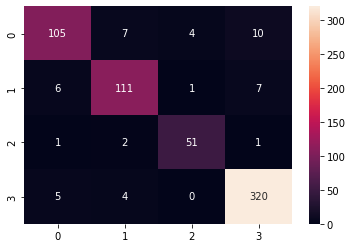

In [ ]:
sns.heatmap(cm, annot=True,fmt="d")

Classification Report:



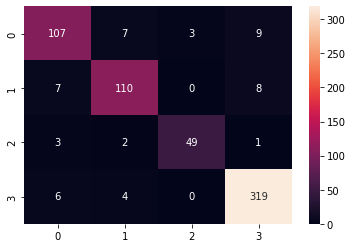

In [ ]:
cm=confusion_matrix(y_test, ysvm)
print("Classification Report:\n")
cr=classification_report(y_test,ysvm)
print(cr)
sns.heatmap(cm, annot=True,fmt="d")

In [ ]:
ysvm1 = sv.predict(X_train_encode)

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       504
           1       0.98      0.97      0.98       496
           2       0.96      0.97      0.97       220
           3       0.97      0.99      0.98      1316

    accuracy                           0.97      2536
   macro avg       0.97      0.96      0.96      2536
weighted avg       0.97      0.97      0.97      2536



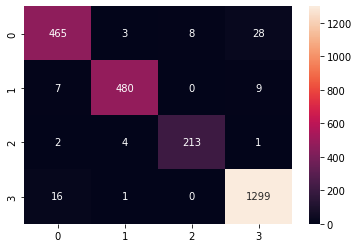

In [ ]:
cm=confusion_matrix(y_train, ysvm1)
print("Classification Report:\n")
cr=classification_report(y_train,ysvm1)
print(cr)
sns.heatmap(cm, annot=True,fmt="d")

In [ ]:
acc = sv.score(X_test_encode, y_test)
print(acc)

0.9133858267716536


In [ ]:
acct = sv.score(X_train_encode, y_train)
print(acct)

0.9704258675078864


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
 
knn.fit(X_train_encode, y_train)
 
# Predict on dataset which model has not seen before
yknn = knn.predict(X_test_encode)

In [ ]:
acct = knn.score(X_train_encode, y_train)
print(acct)

In [ ]:
acct = knn.score(X_test_encode, y_test)
print(acct)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_encode, y_train)
ydec = clf.predict(X_test_encode)

In [ ]:
acct = clf.score(X_test_encode, y_test)
print(acct)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
RF_model.fit(X_train_encode, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
yhat = RF_model.predict(X_test_encode)

In [ ]:
acc = RF_model.score(X_test_encode, y_test)
print(acc)

0.8267716535433071


In [ ]:
acct = RF_model.score(X_train_encode, y_train)
print(acct)

1.0


In [ ]:
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
inChannel = 3
x, y = 64, 64
input_img = Input(shape = (x, y, inChannel))
num_classes = 38

e = Conv2D(32, (2, 2), activation='relu', padding='same')(input_img) # kernel size 17x17 olarak değiştirdim ve padding valid yaptım.
e = BatchNormalization()(e)
e = MaxPooling2D(pool_size=(2, 2))(e)
e = Conv2D(16, (2, 2), activation='relu', padding='same')(e)
e = BatchNormalization()(e)
e = MaxPooling2D(pool_size=(2, 2))(e) 
e = Conv2D(8, (2, 2), activation='relu', padding='same')(e) 
e = BatchNormalization()(e)
e = MaxPooling2D(pool_size=(2, 2))(e)
e = Conv2D(8, (2, 2), activation='relu', padding='same')(e)
e = BatchNormalization()(e)
b = MaxPooling2D(pool_size=(2, 2))(e)

d = Conv2D(8, (2, 2), activation='relu', padding='same')(b) 
d = BatchNormalization()(d)
d = UpSampling2D((2,2))(d) 
d = Conv2D(8, (2, 2), activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = UpSampling2D((2,2))(d) 
d = Conv2D(16, (2, 2), activation='relu', padding='same')(d) 
d = BatchNormalization()(d)
d = UpSampling2D((2,2))(d) 
d = Conv2D(32, (2, 2), activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = UpSampling2D((2,2))(d) 
d = Conv2D(3, (2,2), activation='sigmoid', padding='same')(d)

autoencoder = Model(inputs=input_img, outputs=d)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
autoencoder.compile(loss='categorical_crossentropy', optimizer = optimizer,metrics=['accuracy'])

In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 batch_normalization_9 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2064      
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 16)       64  

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


80/80 [==============================] - 9s 108ms/step - loss: 625.5229 - accuracy: 0.4430 - val_loss: 436.8274 - val_accuracy: 0.2695
Epoch 2/10
80/80 [==============================] - 7s 83ms/step - loss: 704.6039 - accuracy: 0.4525 - val_loss: 581.9319 - val_accuracy: 0.3916
Epoch 3/10
80/80 [==============================] - 7s 82ms/step - loss: 732.6741 - accuracy: 0.4489 - val_loss: 689.8808 - val_accuracy: 0.4582
Epoch 4/10
80/80 [==============================] - 7s 82ms/step - loss: 764.6254 - accuracy: 0.4396 - val_loss: 743.0395 - val_accuracy: 0.4258
Epoch 5/10
80/80 [==============================] - 7s 83ms/step - loss: 799.9234 - accuracy: 0.4292 - val_loss: 757.6744 - val_accuracy: 0.3659
Epoch 6/10
80/80 [==============================] - 7s 82ms/step - loss: 837.3644 - accuracy: 0.3969 - val_loss: 820.3032 - val_accuracy: 0.2860
Epoch 7/10
80/80 [==============================] - 7s 82ms/step - loss: 875.2391 - accuracy: 0.3491 - val_loss: 830.0997 - val_accuracy: 0.

In [ ]:
from keras import regularizers

In [ ]:
x = Input(shape=(64, 64, 3)) 

# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
r = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up3)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse', metrics=[('accuracy')])

In [ ]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 8)         1160      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 8)         584 

In [ ]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=10, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


254/254 [==============================] - 13s 50ms/step - loss: 15235.7637 - accuracy: 0.2193 - val_loss: 15038.8975 - val_accuracy: 0.2214
Epoch 2/10
254/254 [==============================] - 11s 43ms/step - loss: 15235.7617 - accuracy: 0.2193 - val_loss: 15038.8975 - val_accuracy: 0.2215
Epoch 3/10
254/254 [==============================] - 12s 47ms/step - loss: 15235.7637 - accuracy: 0.2193 - val_loss: 15038.8975 - val_accuracy: 0.2215
Epoch 4/10
254/254 [==============================] - 13s 53ms/step - loss: 15235.7646 - accuracy: 0.2193 - val_loss: 15038.8975 - val_accuracy: 0.2215
Epoch 5/10
254/254 [==============================] - 15s 61ms/step - loss: 15235.7588 - accuracy: 0.2193 - val_loss: 15038.8975 - val_accuracy: 0.2215
Epoch 6/10
254/254 [==============================] - 20s 80ms/step - loss: 15235.7588 - accuracy: 0.2193 - val_loss: 15038.8975 - val_accuracy: 0.2215
Epoch 7/10
254/254 [==============================] - 16s 63ms/step - loss: 15235.7666 - accuracy: 

# **This section is to be considered**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys

import keras
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D, MaxPool2D, Flatten, BatchNormalization
from keras.layers import Conv1D, MaxPool1D, CuDNNLSTM, Reshape
from keras.layers import Input, Dense, Dropout, Activation, Add, Concatenate
from keras.datasets import cifar10
from keras import regularizers
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adadelta
import keras.backend as K
from tensorflow.keras.metrics import mean_squared_error
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

from sklearn.utils import class_weight
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer, RobustScaler, StandardScaler

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:
def create_block(input, chs): ## Convolution block of 2 layers
    x = input
    for i in range(2):
        x = Conv2D(chs, 3, padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
    return x

##############################

## Here, I compute the class weights for using in different models. 
## This is to order our model to emphasize more on classes with less training data.

##############################

def showOrigDec(orig, dec, num=4):  ## function used for visualizing original and reconstructed images of the autoencoder model
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[300*i].reshape(64, 64, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(dec[300*i].reshape(64, 64, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

def show_test(m, d):  ## function used for visualizing the predicted and true labels of test data
    plt.figure(figsize =(40,8))
    for i in range(5):
        ax = plt.subplot(1, 5, i+1)
        test_image = np.expand_dims(d[1810*i+5], axis=0)
        test_result = m.predict(test_image)
        plt.imshow(x_test[1810*i+5])
        index = np.argsort(test_result[0,:])
        plt.title("Pred:{}, True:{}".format(dict[index[9]], dict[y_test[1810*i+5][0]]))
    plt.show()
    
def report(predictions): ## function used for creating a classification report and confusion matrix
    cm=confusion_matrix(y_test_one_hot.argmax(axis=1), predictions.argmax(axis=1))
    print("Classification Report:\n")
    cr=classification_report(y_test_one_hot.argmax(axis=1),
                                predictions.argmax(axis=1))
    print(cr)
    plt.figure(figsize=(12,12))
    sns.heatmap(cm, annot=True,fmt="d")

In [ ]:
def showOrigDec(orig, dec, num=4):  ## function used for visualizing original and reconstructed images of the autoencoder model
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[300*i].reshape(64, 64, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(dec[300*i].reshape(64, 64, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [ ]:
def unet():  ## I commented several layers of the model for descreasing model complexity as the results were almost same
    input = Input((64,64,3))
    
    # Encoder
    block1 = create_block(input, 16)
    x = MaxPool2D(2)(block1)
    block2 = create_block(x, 32)
    #x = MaxPool2D(2)(block2)
    #block3 = create_block(x, 64)
    #x = MaxPool2D(2)(block3)
    #block4 = create_block(x, 128)
    
    # Middle
    x = MaxPool2D(2)(block2)
    middle = create_block(x, 64)
    
    # Decoder
    #x = Conv2DTranspose(128, kernel_size=2, strides=2)(middle)
    #x = Concatenate()([block4, x])
    #x = create_block(x, 128)
    #x = Conv2DTranspose(64, kernel_size=2, strides=2)(x)
    #x = Concatenate()([block3, x])
    #x = create_block(x, 64)
    x = Conv2DTranspose(32, kernel_size=2, strides=2)(middle)
    x = Concatenate()([block2, x])
    x = create_block(x, 32)
    x = Conv2DTranspose(16, kernel_size=2, strides=2)(x)
    x = Concatenate()([block1, x])
    x = create_block(x, 16)
    
    # output
    x = Conv2D(3, 1)(x)
    output = Activation("sigmoid")(x)
    
    return Model(input, middle), Model(input, output)

def general_ae():
    input = Input((64,64,3))
    
    # Encoder
    block1 = create_block(input, 32)
    x = MaxPool2D(2)(block1)
    block2 = create_block(x, 64)
    x = MaxPool2D(2)(block2)
    
    #Middle
    middle = Conv2D(128, 3, padding="same")(x)
    middle = Activation("relu")(middle)
    middle = BatchNormalization()(middle)
    
    # Decoder
    up1 = UpSampling2D((2,2))(middle)
    block3 = create_block(up1, 64)
    up2 = UpSampling2D((2,2))(block3)
    block4 = create_block(up2, 32)
    
    # output
    x = Conv2D(3, 1)(block4)
    output = Activation("sigmoid")(x)
    return Model(input, middle), Model(input, output)

In [ ]:
def run_ae(m):  ## function for choosing unet/general autoencoder
    if m=='unet':
        encoder, model = unet()
    elif m=='ae':
        encoder, model = general_ae()
        
    return encoder, model

In [ ]:
def loss_function(y_true, y_pred):  ## loss function for using in autoencoder models
    mses = mean_squared_error(y_true, y_pred)
    return K.sum(mses, axis=(1,2))

In [ ]:
encoder_unet, model_unet = run_ae('unet')
model_unet.compile(SGD(1e-3, 0.9), loss=loss_function)
model_unet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 16)   448         ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 64, 64, 16)   0           ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 16)  64          ['activation[0][0]']             
 alization)                                                                                 

In [ ]:
er = EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, min_delta=0.0001)
callbacks = [er, lr]
history = model_unet.fit(x_train, x_train, 
                         batch_size=32,
                         epochs=100,
                         verbose=1,
                         validation_data=(x_test, x_test),shuffle=True, callbacks=callbacks)

Epoch 1/100
80/80 [==============================] - 10s 67ms/step - loss: 31.0589 - val_loss: 155.3134 - lr: 0.0010
Epoch 2/100
80/80 [==============================] - 4s 51ms/step - loss: 15.9762 - val_loss: 52.2542 - lr: 0.0010
Epoch 3/100
80/80 [==============================] - 4s 51ms/step - loss: 9.2537 - val_loss: 16.8513 - lr: 0.0010
Epoch 4/100
80/80 [==============================] - 4s 55ms/step - loss: 6.7399 - val_loss: 17.4688 - lr: 0.0010
Epoch 5/100
80/80 [==============================] - 4s 52ms/step - loss: 5.2426 - val_loss: 13.0351 - lr: 0.0010
Epoch 6/100
80/80 [==============================] - 4s 51ms/step - loss: 5.3311 - val_loss: 12.0274 - lr: 0.0010
Epoch 7/100
80/80 [==============================] - 4s 52ms/step - loss: 4.8949 - val_loss: 8.6338 - lr: 0.0010
Epoch 8/100
80/80 [==============================] - 4s 51ms/step - loss: 4.5570 - val_loss: 12.4536 - lr: 0.0010
Epoch 9/100
80/80 [==============================] - 4s 51ms/step - loss: 3.5651 - va

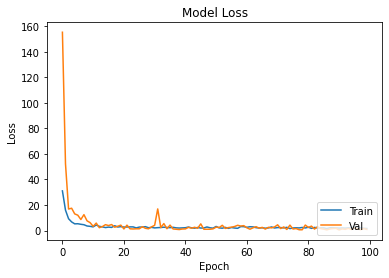

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
recon_test_unet = model_unet.predict(x_test)

IndexError: ignored

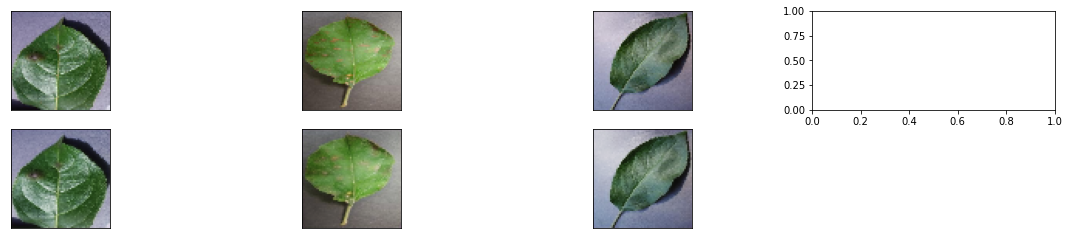

In [ ]:
showOrigDec(x_test, recon_test_unet)

In [ ]:
encoder_ae, model_ae = run_ae('ae')
model_ae.compile('adam', loss=loss_function, metrics=["accuracy"])
model_ae.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 activation_11 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 batch_normalization_10 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 activation_12 (Activation)  (None, 64, 64, 32)        0         
                                                           

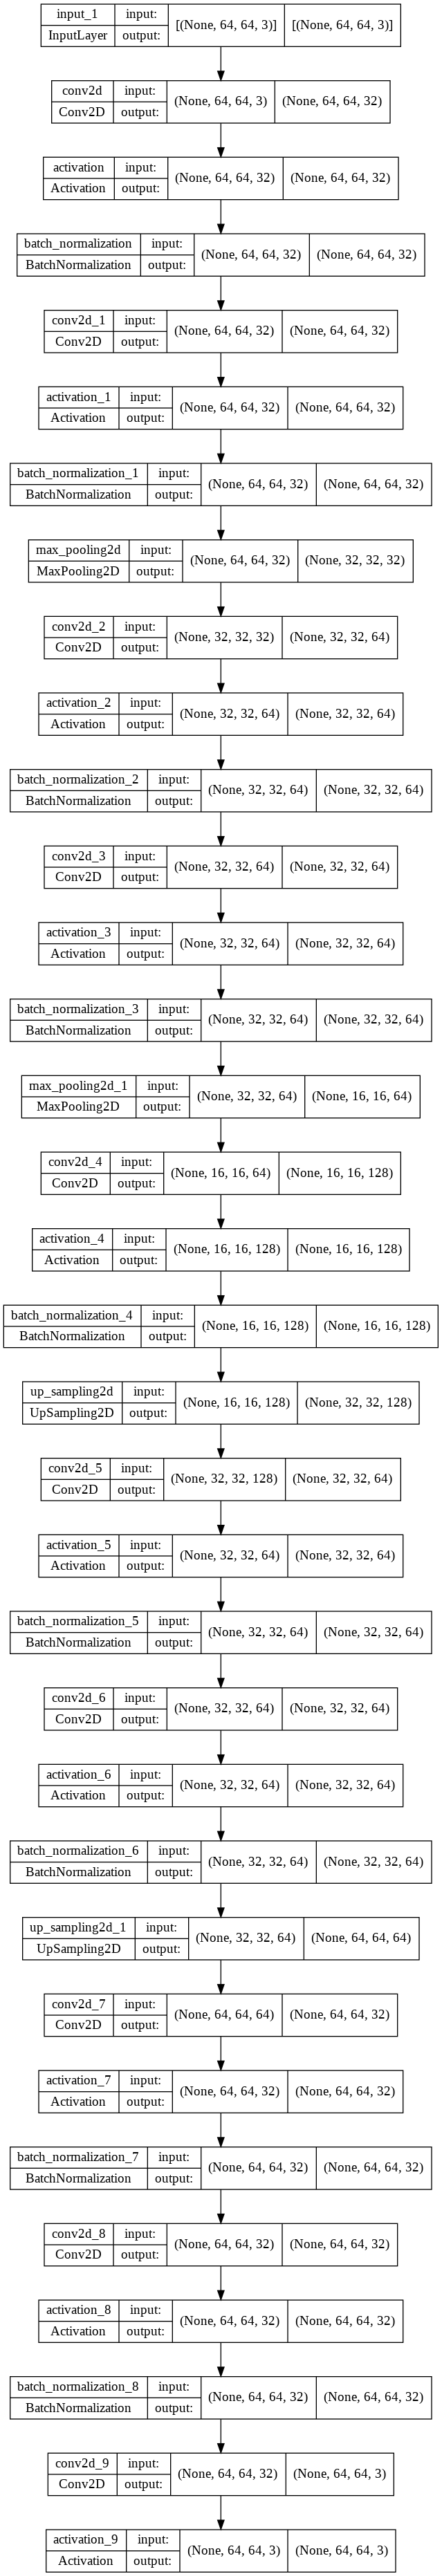

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_ae, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
encoder_ae, model_ae = run_ae('ae')
model_ae.compile('adam', loss=loss_function, metrics=["accuracy"])
model_ae.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 64, 64, 32)        0         
                                                           

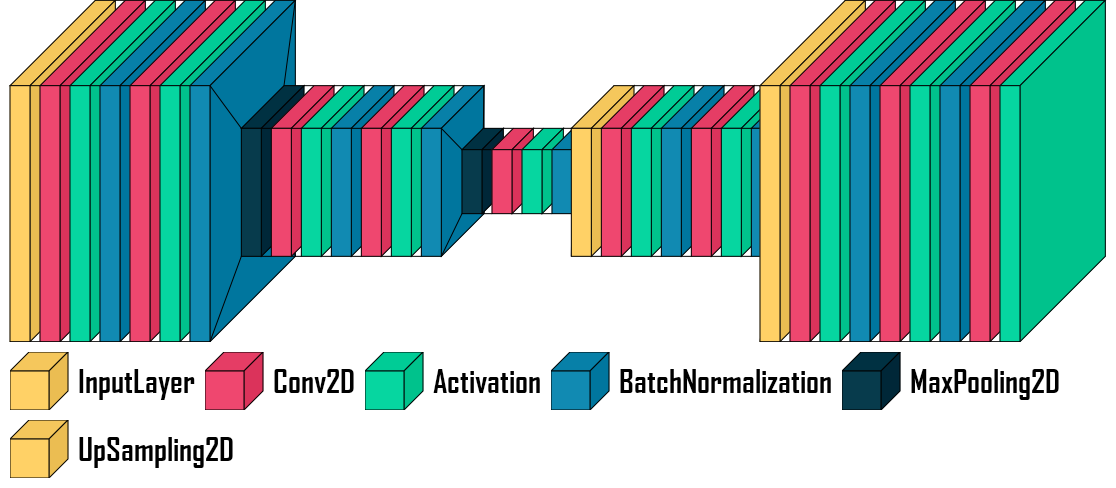

In [ ]:
#!pip install visualkeras
import visualkeras
from PIL import ImageFont

font = ImageFont.truetype("/content/AGENCYB.TTF", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model_ae, legend=True, font=font, to_file='output.png')
#visualkeras.layered_view(model_ae, to_file='output.png')

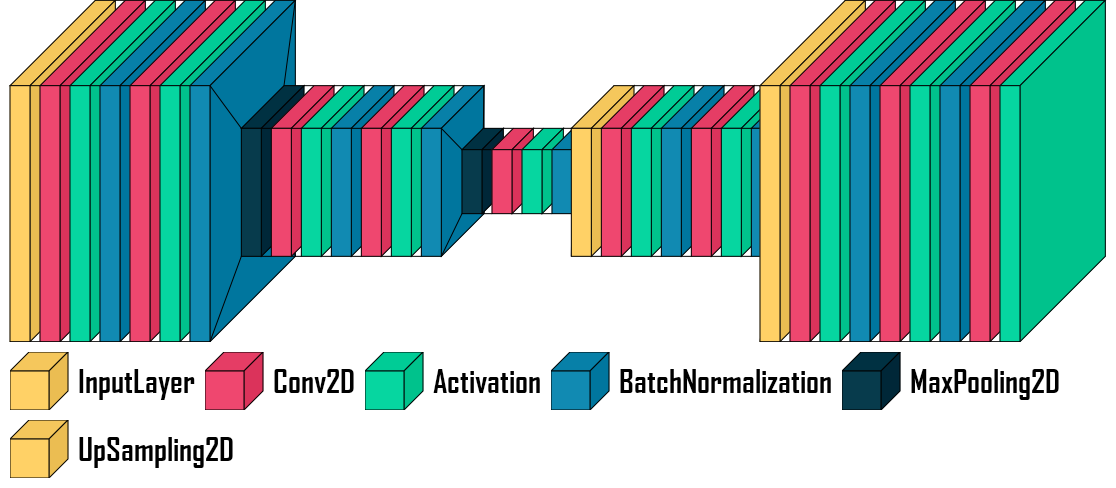

In [ ]:
#!pip install visualkeras
import visualkeras
from PIL import ImageFont

font = ImageFont.truetype("/content/AGENCYB.TTF", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model_ae, legend=True, font=font, to_file='output.png')
#visualkeras.layered_view(model_ae, to_file='output.png')

In [ ]:
encoder_ae, model_ae = run_ae('ae')
model_ae.compile(SGD(1e-3, 0.9), loss=loss_function)
model_ae.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 activation_24 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 batch_normalization_30 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 activation_25 (Activation)  (None, 64, 64, 32)        0         
                                                           

In [ ]:
er = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_delta=0.0001)
callbacks = [er, lr]
history = model_ae.fit(x_train, x_train, 
                       batch_size=32,
                       epochs=100,
                       verbose=1,
                       validation_data=(x_test, x_test),
                       shuffle=True, callbacks=callbacks)
#new Date: 24-07-2022

Epoch 1/100
80/80 [==============================] - 17s 48ms/step - loss: 40.5922 - accuracy: 0.6988 - val_loss: 136.3745 - val_accuracy: 0.4465 - lr: 0.0010
Epoch 2/100
80/80 [==============================] - 3s 33ms/step - loss: 16.8216 - accuracy: 0.8155 - val_loss: 103.1751 - val_accuracy: 0.6428 - lr: 0.0010
Epoch 3/100
80/80 [==============================] - 3s 33ms/step - loss: 14.1215 - accuracy: 0.8376 - val_loss: 84.8938 - val_accuracy: 0.6695 - lr: 0.0010
Epoch 4/100
80/80 [==============================] - 3s 33ms/step - loss: 12.7005 - accuracy: 0.8538 - val_loss: 48.8752 - val_accuracy: 0.6808 - lr: 0.0010
Epoch 5/100
80/80 [==============================] - 3s 33ms/step - loss: 11.9673 - accuracy: 0.8611 - val_loss: 32.5594 - val_accuracy: 0.7495 - lr: 0.0010
Epoch 6/100
80/80 [==============================] - 3s 33ms/step - loss: 11.2116 - accuracy: 0.8722 - val_loss: 19.3184 - val_accuracy: 0.7924 - lr: 0.0010
Epoch 7/100
80/80 [==============================] - 3s

In [ ]:
er = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_delta=0.0001)
callbacks = [er, lr]
history = model_ae.fit(x_train, x_train, 
                       batch_size=32,
                       epochs=100,
                       verbose=1,
                       validation_data=(x_test, x_test),
                       shuffle=True, callbacks=callbacks)
#new Date: 21-07-2022

Epoch 1/100
80/80 [==============================] - 17s 49ms/step - loss: 38.7401 - accuracy: 0.6959 - val_loss: 139.8549 - val_accuracy: 0.4328 - lr: 0.0010
Epoch 2/100
80/80 [==============================] - 3s 33ms/step - loss: 15.3928 - accuracy: 0.8236 - val_loss: 111.7566 - val_accuracy: 0.4849 - lr: 0.0010
Epoch 3/100
80/80 [==============================] - 3s 33ms/step - loss: 13.1592 - accuracy: 0.8505 - val_loss: 95.2921 - val_accuracy: 0.5067 - lr: 0.0010
Epoch 4/100
80/80 [==============================] - 3s 34ms/step - loss: 11.7598 - accuracy: 0.8655 - val_loss: 62.0358 - val_accuracy: 0.5626 - lr: 0.0010
Epoch 5/100
80/80 [==============================] - 3s 33ms/step - loss: 11.2663 - accuracy: 0.8664 - val_loss: 36.0204 - val_accuracy: 0.6380 - lr: 0.0010
Epoch 6/100
80/80 [==============================] - 3s 34ms/step - loss: 10.2238 - accuracy: 0.8785 - val_loss: 22.0926 - val_accuracy: 0.7197 - lr: 0.0010
Epoch 7/100
80/80 [==============================] - 3s

In [ ]:
er = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_delta=0.0001)
callbacks = [er, lr]
history = model_ae.fit(x_train, x_train, 
                       batch_size=32,
                       epochs=100,
                       verbose=1,
                       validation_data=(x_test, x_test),
                       shuffle=True, callbacks=callbacks)
#new

Epoch 1/100
80/80 [==============================] - 14s 127ms/step - loss: 41.0840 - accuracy: 0.6879 - val_loss: 114.9166 - val_accuracy: 0.4093 - lr: 0.0010
Epoch 2/100
80/80 [==============================] - 8s 102ms/step - loss: 16.0785 - accuracy: 0.8067 - val_loss: 101.0025 - val_accuracy: 0.5050 - lr: 0.0010
Epoch 3/100
80/80 [==============================] - 8s 102ms/step - loss: 13.5605 - accuracy: 0.8354 - val_loss: 79.0371 - val_accuracy: 0.5469 - lr: 0.0010
Epoch 4/100
80/80 [==============================] - 8s 103ms/step - loss: 12.1458 - accuracy: 0.8515 - val_loss: 56.1790 - val_accuracy: 0.5972 - lr: 0.0010
Epoch 5/100
80/80 [==============================] - 8s 102ms/step - loss: 11.6713 - accuracy: 0.8583 - val_loss: 32.4450 - val_accuracy: 0.6162 - lr: 0.0010
Epoch 6/100
80/80 [==============================] - 8s 102ms/step - loss: 10.8244 - accuracy: 0.8662 - val_loss: 23.2201 - val_accuracy: 0.6956 - lr: 0.0010
Epoch 7/100
80/80 [==============================

In [ ]:
model_ae.evaluate(x_test, x_test)
#new Date:24-07/2022

20/20 [==============================] - 0s 14ms/step - loss: 5.4822 - accuracy: 0.9305


[5.482242107391357, 0.9305460453033447]

In [ ]:
model_ae.evaluate(x_train, x_train)
#new Date:24-07/2022

80/80 [==============================] - 1s 10ms/step - loss: 5.3662 - accuracy: 0.9334


[5.366197109222412, 0.933404266834259]

In [ ]:
model_ae.evaluate(x_test, x_test)
#new Date:21-07/2022

20/20 [==============================] - 0s 14ms/step - loss: 5.6645 - accuracy: 0.9291


[5.664492607116699, 0.9291157722473145]

In [ ]:
model_ae.evaluate(x_test, x_test)

20/20 [==============================] - 1s 32ms/step - loss: 5.5914 - accuracy: 0.9295


[5.591381549835205, 0.9294760227203369]

In [ ]:
er = EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, min_delta=0.0001)
callbacks = [er, lr]
history = model_ae.fit(x_train, x_train, 
                       batch_size=32,
                       epochs=100,
                       verbose=1,
                       validation_data=(x_test, x_test),
                       shuffle=True, callbacks=callbacks)

Epoch 1/100
80/80 [==============================] - 10s 74ms/step - loss: 54.1645 - val_loss: 620.9536 - lr: 0.0010
Epoch 2/100
80/80 [==============================] - 5s 62ms/step - loss: 27.1048 - val_loss: 71.6620 - lr: 0.0010
Epoch 3/100
80/80 [==============================] - 5s 58ms/step - loss: 22.0171 - val_loss: 27.4030 - lr: 0.0010
Epoch 4/100
80/80 [==============================] - 5s 58ms/step - loss: 20.6246 - val_loss: 22.4105 - lr: 0.0010
Epoch 5/100
80/80 [==============================] - 5s 58ms/step - loss: 19.9568 - val_loss: 22.1179 - lr: 0.0010
Epoch 6/100
80/80 [==============================] - 5s 58ms/step - loss: 19.2133 - val_loss: 22.7711 - lr: 0.0010
Epoch 7/100
80/80 [==============================] - 5s 58ms/step - loss: 18.8453 - val_loss: 19.0341 - lr: 0.0010
Epoch 8/100
80/80 [==============================] - 5s 58ms/step - loss: 17.3338 - val_loss: 23.4622 - lr: 0.0010
Epoch 9/100
80/80 [==============================] - 5s 58ms/step - loss: 17.3

In [ ]:
recon_test_ae = model_ae.predict(x_test)

In [ ]:
#gist_train_unet = encoder_unet.predict(x_train)
#gist_test_unet = encoder_unet.predict(x_test)

gist_train_ae = encoder_ae.predict(x_train)
gist_test_ae = encoder_ae.predict(x_test)

In [ ]:
def classifier_dense(inp):
    input = Input((inp.shape[1], inp.shape[2], inp.shape[3]))
    #x = MaxPool2D()(input)
    x = Flatten()(input)
    #x = BatchNormalization()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.64)(x)
    x = Dense(50, activation='relu')(x)
    #x = Reshape((-1, 1))(x)
    #x = Conv1D(128, (3,), activation='relu', padding='same')(x)
    #x = MaxPool1D()(x)
    #x = CuDNNLSTM(64)(x)
    #x = Flatten()(x)
    x = Dropout(0.4)(x)
    output = Dense(4, activation='softmax')(x)
    return Model(input, output)

def classifier_conv(inp):
    input = Input((inp.shape[1], inp.shape[2], inp.shape[3]))
    x = Conv2D(1024, 3, padding="same")(input)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(2)(x)
    x = Dropout(0.5)(x)
    x = Conv2D(128, 3, padding="same")(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(2)(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.35)(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.69)(x)
    output = Dense(4, activation='softmax')(x)
    return Model(input, output)

In [ ]:
def run_cls(m, inp):  ## function for choosing dense/convolutional classifier model
    if m=='dense':
        classifier = classifier_dense(inp)
    elif m=='conv':
        classifier = classifier_conv(inp)
        
    return classifier

In [ ]:
decoder_ae_conv = run_cls('conv', gist_train_ae)
decoder_ae_conv.compile(loss='categorical_crossentropy',
                        optimizer='adam',
                        metrics=['categorical_accuracy'])
decoder_ae_conv.summary()
#new Date:21/07/2022

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 16, 16, 128)]     0         
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 1024)      1180672   
                                                                 
 activation_27 (Activation)  (None, 16, 16, 1024)      0         
                                                                 
 batch_normalization_25 (Bat  (None, 16, 16, 1024)     4096      
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 1024)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 8, 8, 1024)        0   

In [ ]:
decoder_ae_conv = run_cls('conv', gist_train_ae)
decoder_ae_conv.compile(loss='categorical_crossentropy',
                        optimizer='adam',
                        metrics=['categorical_accuracy'])
decoder_ae_conv.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 16, 16, 128)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 1024)      1180672   
                                                                 
 activation_20 (Activation)  (None, 16, 16, 1024)      0         
                                                                 
 batch_normalization_18 (Bat  (None, 16, 16, 1024)     4096      
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 1024)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 1024)        0   

In [ ]:
er = EarlyStopping(monitor='val_categorical_accuracy', patience=10, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=5, min_delta=0.0001)
callbacks = [lr]

In [ ]:
hist1 = decoder_ae_conv.fit(gist_train_ae, y_train, batch_size=32, epochs=40, 
                            validation_data = (gist_test_ae, y_test_one_hot),
                            shuffle=True, callbacks=callbacks) 
#new Date:24/07/2022

Epoch 1/40
80/80 [==============================] - 2s 19ms/step - loss: 1.4515 - categorical_accuracy: 0.5804 - val_loss: 0.7617 - val_categorical_accuracy: 0.6945 - lr: 0.0010
Epoch 2/40
80/80 [==============================] - 1s 15ms/step - loss: 0.7211 - categorical_accuracy: 0.7461 - val_loss: 0.3804 - val_categorical_accuracy: 0.8299 - lr: 0.0010
Epoch 3/40
80/80 [==============================] - 1s 15ms/step - loss: 0.4757 - categorical_accuracy: 0.8415 - val_loss: 0.1968 - val_categorical_accuracy: 0.9307 - lr: 0.0010
Epoch 4/40
80/80 [==============================] - 1s 15ms/step - loss: 0.3743 - categorical_accuracy: 0.8825 - val_loss: 0.1684 - val_categorical_accuracy: 0.9480 - lr: 0.0010
Epoch 5/40
80/80 [==============================] - 1s 16ms/step - loss: 0.3036 - categorical_accuracy: 0.9089 - val_loss: 0.1651 - val_categorical_accuracy: 0.9591 - lr: 0.0010
Epoch 6/40
80/80 [==============================] - 1s 15ms/step - loss: 0.2353 - categorical_accuracy: 0.9200

In [ ]:
hist1 = decoder_ae_conv.fit(gist_train_ae, y_train, batch_size=32, epochs=100, 
                            validation_data = (gist_test_ae, y_test_one_hot),
                            shuffle=True, callbacks=callbacks) 
#new Date:21/07/2022

Epoch 1/100
80/80 [==============================] - 2s 19ms/step - loss: 1.3727 - categorical_accuracy: 0.5797 - val_loss: 0.5331 - val_categorical_accuracy: 0.7669 - lr: 0.0010
Epoch 2/100
80/80 [==============================] - 1s 16ms/step - loss: 0.6934 - categorical_accuracy: 0.7539 - val_loss: 0.3740 - val_categorical_accuracy: 0.8646 - lr: 0.0010
Epoch 3/100
80/80 [==============================] - 1s 16ms/step - loss: 0.5194 - categorical_accuracy: 0.8328 - val_loss: 0.3308 - val_categorical_accuracy: 0.8866 - lr: 0.0010
Epoch 4/100
80/80 [==============================] - 1s 16ms/step - loss: 0.3922 - categorical_accuracy: 0.8715 - val_loss: 0.1757 - val_categorical_accuracy: 0.9354 - lr: 0.0010
Epoch 5/100
80/80 [==============================] - 1s 16ms/step - loss: 0.3053 - categorical_accuracy: 0.9034 - val_loss: 0.1520 - val_categorical_accuracy: 0.9543 - lr: 0.0010
Epoch 6/100
80/80 [==============================] - 1s 16ms/step - loss: 0.3116 - categorical_accuracy: 

In [ ]:
hist1 = decoder_ae_conv.fit(gist_train_ae, y_train, batch_size=32, epochs=100, 
                            validation_data = (gist_test_ae, y_test_one_hot),
                            shuffle=True, callbacks=callbacks) #new

Epoch 1/100
80/80 [==============================] - 6s 60ms/step - loss: 1.4150 - categorical_accuracy: 0.5856 - val_loss: 0.6960 - val_categorical_accuracy: 0.7150 - lr: 0.0010
Epoch 2/100
80/80 [==============================] - 3s 40ms/step - loss: 0.6588 - categorical_accuracy: 0.7599 - val_loss: 0.3926 - val_categorical_accuracy: 0.8630 - lr: 0.0010
Epoch 3/100
80/80 [==============================] - 3s 40ms/step - loss: 0.5034 - categorical_accuracy: 0.8277 - val_loss: 0.2537 - val_categorical_accuracy: 0.9150 - lr: 0.0010
Epoch 4/100
80/80 [==============================] - 3s 40ms/step - loss: 0.4118 - categorical_accuracy: 0.8695 - val_loss: 0.2175 - val_categorical_accuracy: 0.9354 - lr: 0.0010
Epoch 5/100
80/80 [==============================] - 3s 40ms/step - loss: 0.3050 - categorical_accuracy: 0.8971 - val_loss: 0.1813 - val_categorical_accuracy: 0.9449 - lr: 0.0010
Epoch 6/100
80/80 [==============================] - 3s 39ms/step - loss: 0.2760 - categorical_accuracy: 

In [ ]:
hist1 = decoder_ae_conv.fit(gist_train_ae, y_train, batch_size=32, epochs=100, 
                            validation_data = (gist_test_ae, y_test_one_hot),
                            shuffle=True) #new

Epoch 1/100
80/80 [==============================] - 7s 60ms/step - loss: 1.5245 - categorical_accuracy: 0.5505 - val_loss: 0.7889 - val_categorical_accuracy: 0.6661 - lr: 0.0010
Epoch 2/100
80/80 [==============================] - 3s 40ms/step - loss: 0.8723 - categorical_accuracy: 0.6845 - val_loss: 0.5566 - val_categorical_accuracy: 0.7827 - lr: 0.0010
Epoch 3/100
80/80 [==============================] - 3s 40ms/step - loss: 0.7036 - categorical_accuracy: 0.7421 - val_loss: 0.4387 - val_categorical_accuracy: 0.8362 - lr: 0.0010
Epoch 4/100
80/80 [==============================] - 3s 40ms/step - loss: 0.6230 - categorical_accuracy: 0.7737 - val_loss: 0.3832 - val_categorical_accuracy: 0.8630 - lr: 0.0010
Epoch 5/100
80/80 [==============================] - 3s 40ms/step - loss: 0.5435 - categorical_accuracy: 0.8178 - val_loss: 0.3563 - val_categorical_accuracy: 0.8724 - lr: 0.0010
Epoch 6/100
80/80 [==============================] - 3s 40ms/step - loss: 0.4680 - categorical_accuracy: 

In [ ]:
hist1 = decoder_ae_conv.fit(gist_train_ae, y_train, batch_size=32, epochs=100, 
                            validation_data = (gist_test_ae, y_test_one_hot),
                            shuffle=True, callbacks=callbacks)

Epoch 1/100
80/80 [==============================] - 5s 45ms/step - loss: 1.5111 - accuracy: 0.5327 - val_loss: 1.5883 - val_accuracy: 0.5228 - lr: 0.0010
Epoch 2/100
80/80 [==============================] - 2s 30ms/step - loss: 0.8798 - accuracy: 0.6707 - val_loss: 0.6621 - val_accuracy: 0.7197 - lr: 0.0010
Epoch 3/100
80/80 [==============================] - 2s 31ms/step - loss: 0.6699 - accuracy: 0.7468 - val_loss: 0.4362 - val_accuracy: 0.8362 - lr: 0.0010
Epoch 4/100
80/80 [==============================] - 3s 32ms/step - loss: 0.5258 - accuracy: 0.8202 - val_loss: 0.3450 - val_accuracy: 0.8740 - lr: 0.0010
Epoch 5/100
80/80 [==============================] - 2s 31ms/step - loss: 0.4722 - accuracy: 0.8383 - val_loss: 0.3046 - val_accuracy: 0.9071 - lr: 0.0010
Epoch 6/100
80/80 [==============================] - 2s 30ms/step - loss: 0.3878 - accuracy: 0.8758 - val_loss: 0.2255 - val_accuracy: 0.9244 - lr: 0.0010
Epoch 7/100
80/80 [==============================] - 2s 31ms/step - lo

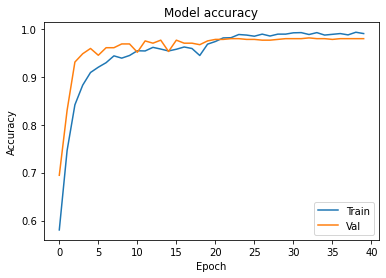

In [ ]:
plt.plot(hist1.history['categorical_accuracy'])
plt.plot(hist1.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

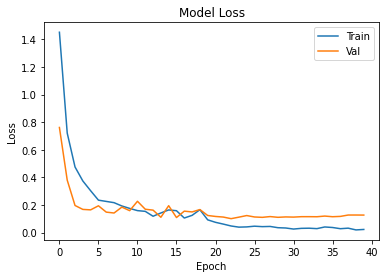

In [ ]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
print('Test accuracy for AE_conv cmodel= {}'.format(decoder_ae_conv.evaluate(gist_test_ae, y_test_one_hot)[1])) 
#new Date 24/07/2022

20/20 [==============================] - 0s 9ms/step - loss: 0.1273 - categorical_accuracy: 0.9795
Test accuracy for AE_conv cmodel= 0.9795275330543518


In [ ]:
print('Test accuracy for AE_conv cmodel= {}'.format(decoder_ae_conv.evaluate(gist_train_ae, y_train)[1])) 
#new Date 24/07/2022

80/80 [==============================] - 1s 11ms/step - loss: 0.0049 - categorical_accuracy: 0.9984
Test accuracy for AE_conv cmodel= 0.9984227418899536


In [ ]:
print('Test accuracy for AE_conv cmodel= {}'.format(decoder_ae_conv.evaluate(gist_test_ae, y_test_one_hot)[1])) 
#new Date 21/07/2022

20/20 [==============================] - 0s 9ms/step - loss: 0.0898 - categorical_accuracy: 0.9764
Test accuracy for AE_conv cmodel= 0.9763779640197754


In [ ]:
print('Test accuracy for AE_conv cmodel= {}'.format(decoder_ae_conv.evaluate(gist_test_ae, y_test_one_hot)[1])) #new

20/20 [==============================] - 0s 15ms/step - loss: 0.1473 - categorical_accuracy: 0.9795
Test accuracy for AE_conv model= 0.9795275330543518


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       126
           1       0.98      0.96      0.97       125
           2       0.96      1.00      0.98        55
           3       0.98      0.99      0.99       329

    accuracy                           0.98       635
   macro avg       0.98      0.98      0.98       635
weighted avg       0.98      0.98      0.98       635



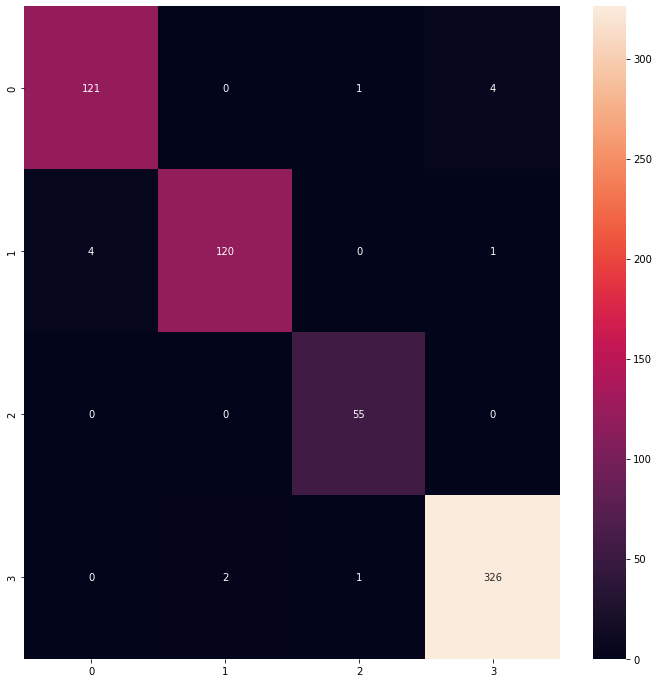

In [ ]:
predictions = decoder_ae_conv.predict(gist_test_ae)
report(predictions) #new Date: 24/07/2022

Classification Report:



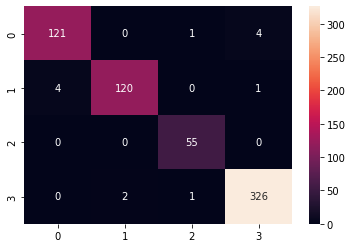

In [ ]:
cm=confusion_matrix(y_test_one_hot.argmax(axis=1), predictions.argmax(axis=1))
print("Classification Report:\n")
cr=classification_report(y_test_one_hot.argmax(axis=1),
                            predictions.argmax(axis=1))

sns.heatmap(cm, annot=True,fmt="d")

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       126
           1       0.98      0.96      0.97       125
           2       0.98      0.98      0.98        55
           3       0.98      0.99      0.98       329

    accuracy                           0.98       635
   macro avg       0.97      0.97      0.97       635
weighted avg       0.98      0.98      0.98       635



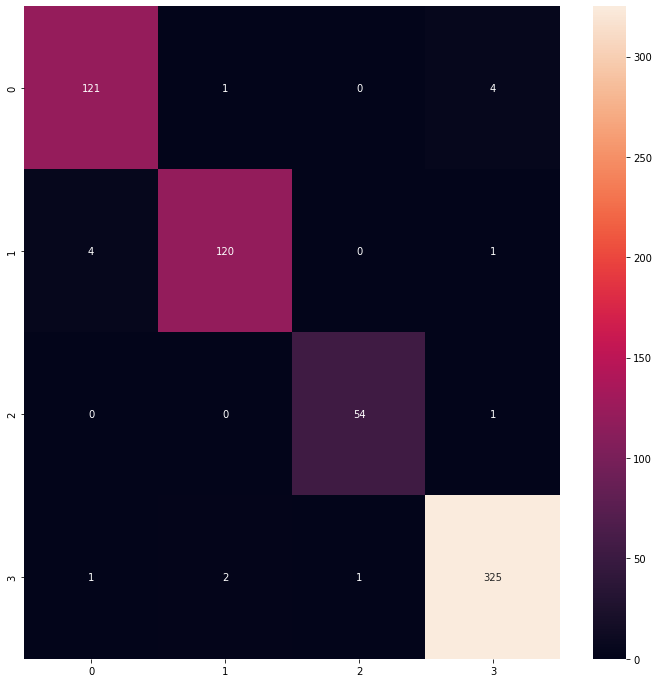

In [ ]:
predictions = decoder_ae_conv.predict(gist_test_ae)
report(predictions) #new Date: 21/07/2022

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       126
           1       0.98      0.96      0.97       125
           2       0.95      1.00      0.97        55
           3       0.99      0.99      0.99       329

    accuracy                           0.98       635
   macro avg       0.97      0.98      0.97       635
weighted avg       0.98      0.98      0.98       635



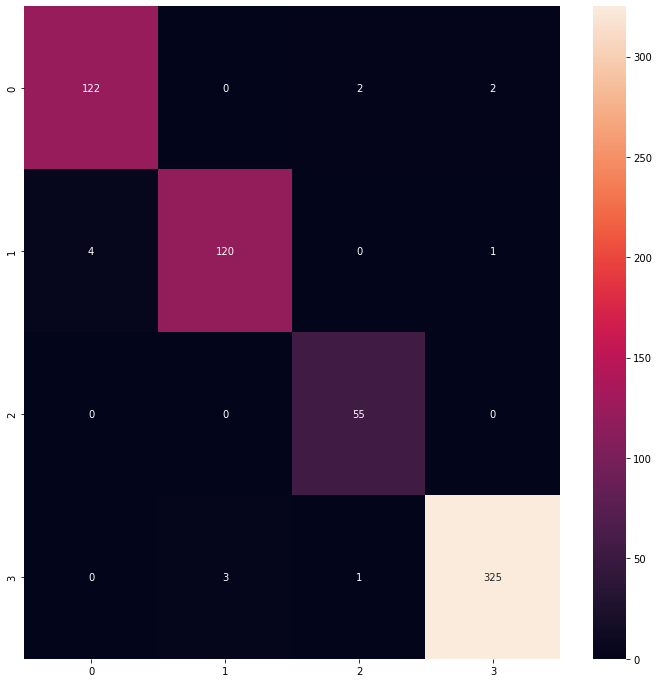

In [ ]:
predictions = decoder_ae_conv.predict(gist_test_ae)
report(predictions) #new

In [ ]:
import random

In [ ]:
test_dir = '/content/PlantVillage/val'
test_paths = []
for i in categories:
  path = os.path.join(data_dir, i)
  for label in os.listdir(path):
      #for file in os.listdir(test_dir+'/'+label):
      test_paths.append(path+'/'+label)
random.shuffle(test_paths)
# show an example of the list
print(test_paths[0])

/content/PlantVillage/val/Apple___healthy/1d44a5a9-c15c-40d5-b2d6-bbd9e84c96ea___RS_HL 7923.JPG


In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
def open_images(paths):
    '''
    Opens a batch of images, given the image path(s) as a list
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(64, 64, 3))
        image = np.array(image)/255.0
        images.append(image)
    return np.array(images)

In [ ]:
len(test_paths)

635

(635, 64, 64, 3)

In [ ]:
import numpy as np
from PIL import Image as im
array = np.array(recon_test_ae[0])
data = im.fromarray((array * 255).astype(np.uint8))
data.save('gfg_dummy_pic.png')

In [ ]:
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

IndexError: ignored

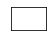

In [ ]:
img = open_images([test_paths[i]])
# expand dimensions so that it represents a single 'sample'
feature_maps = model_ae.predict(img)
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

Predicted: Apple___Black_rot
Actual: Apple___Black_rot


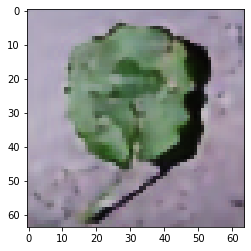

In [ ]:
i = random.randint(0,len(test_paths))
images = open_images([test_paths[i]])
images = model_ae.predict(images)
predicted = encoder_ae.predict(images)
predicted = decoder_ae_conv.predict(predicted)[0]
predicted = np.argmax(predicted)
predicted = categories[predicted]
label = test_paths[i].split('/')[-2]
plt.imshow(images[0])
print('Predicted:', predicted)
print('Actual:', label)

Predicted: Apple___healthy
Actual: Apple___healthy


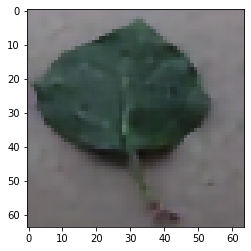

In [ ]:
i = random.randint(0,len(test_paths))
images = open_images([test_paths[i]])
images = model_ae.predict(images)
predicted = encoder_ae.predict(images)
predicted = decoder_ae_conv.predict(predicted)[0]
predicted = np.argmax(predicted)
predicted = categories[predicted]
label = test_paths[i].split('/')[-2]
plt.imshow(images[0])
print('Predicted:', predicted)
print('Actual:', label)

In [ ]:
w_img = []
count = 0
for i in test_paths:
    images = open_images([i])
    #images = model_ae.predict(images)
    predicted = encoder_ae.predict(images)
    predicted = decoder_ae_conv.predict(predicted)
    predicted = np.argmax(predicted)
    predicted = categories[predicted]
    label = i.split('/')[-2]
    if(predicted!=label):
        count+=1
        print(count, predicted, label)
        w_img.append(i)

1 Apple___Black_rot Apple___healthy
2 Apple___Black_rot Apple___healthy
3 Apple___Black_rot Apple___healthy
4 Apple___Cedar_apple_rust Apple___Apple_scab
5 Apple___Apple_scab Apple___Black_rot
6 Apple___healthy Apple___Apple_scab
7 Apple___Black_rot Apple___Apple_scab
8 Apple___Black_rot Apple___healthy
9 Apple___Black_rot Apple___healthy
10 Apple___Black_rot Apple___healthy
11 Apple___healthy Apple___Cedar_apple_rust
12 Apple___healthy Apple___Apple_scab
13 Apple___Black_rot Apple___Apple_scab
14 Apple___Black_rot Apple___Apple_scab
15 Apple___Apple_scab Apple___Black_rot
16 Apple___Apple_scab Apple___Black_rot
17 Apple___Black_rot Apple___healthy
18 Apple___Cedar_apple_rust Apple___Apple_scab
19 Apple___Cedar_apple_rust Apple___healthy
20 Apple___Black_rot Apple___healthy
21 Apple___Apple_scab Apple___Black_rot
22 Apple___Black_rot Apple___healthy


In [ ]:
len(w_img)

In [ ]:
print('Test accuracy for AE_conv model= {}'.format(decoder_ae_conv.evaluate(gist_test_ae, y_test_one_hot)[1]))

20/20 [==============================] - 0s 17ms/step - loss: 0.1473 - categorical_accuracy: 0.9795
Test accuracy for AE_conv model= 0.9795275330543518


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       126
           1       0.98      0.96      0.97       125
           2       0.95      1.00      0.97        55
           3       0.99      0.99      0.99       329

    accuracy                           0.98       635
   macro avg       0.97      0.98      0.97       635
weighted avg       0.98      0.98      0.98       635



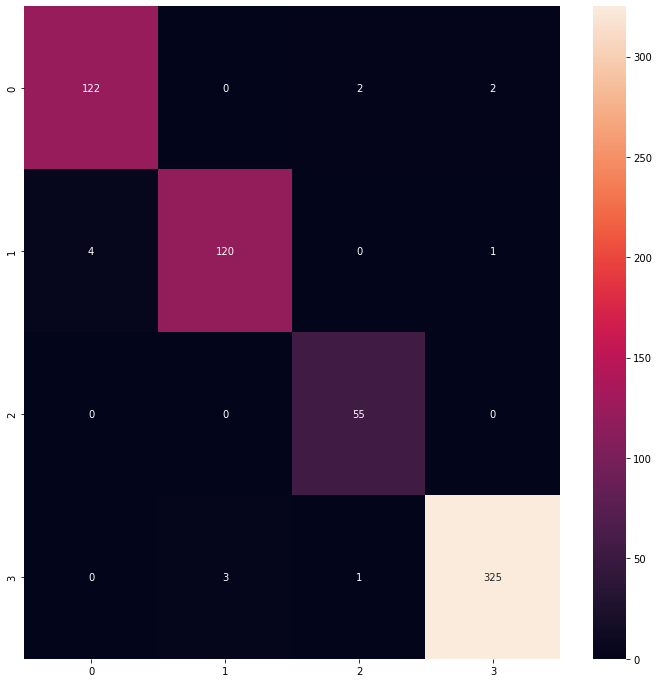

In [ ]:
predictions = decoder_ae_conv.predict(gist_test_ae)
report(predictions)

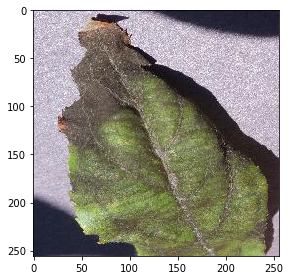

In [ ]:
import sys
import skimage.io
from matplotlib import pyplot as plt

# read original image, in full color, based on command
# line argument
image = skimage.io.imread('/content/PlantVillage/train/Apple___Apple_scab/0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037.JPG')

# display the image
skimage.io.imshow(image)

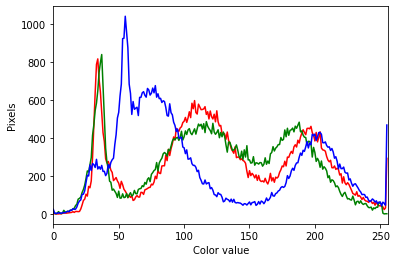

In [ ]:
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

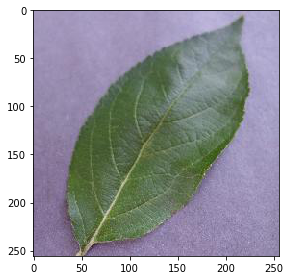

In [ ]:
import sys
import skimage.io
from matplotlib import pyplot as plt

# read original image, in full color, based on command
# line argument
image = skimage.io.imread('/content/PlantVillage/train/Apple___healthy/00fca0da-2db3-481b-b98a-9b67bb7b105c___RS_HL 7708.JPG')

# display the image
skimage.io.imshow(image)

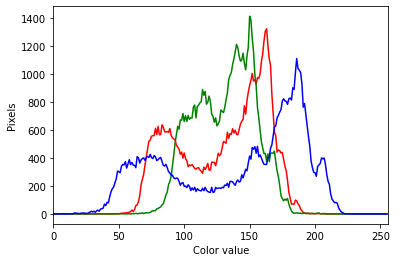

In [ ]:
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

In [ ]:
def grad_guided(path):
  grad_model = tf.keras.models.Model([encoder_ae.input, decoder_ae_conv.input], [encoder_ae.get_layer('conv2d_4').output, decoder_ae_conv.output])

  #Predict the label and get true label for all test samples
  for i in range(0, N_test_examples):
    label_ground_truth = label_matrix_appended_test[i]
    image_ground_truth = image_matrix_appended_test[i]
    image_ground_truth = image_ground_truth 
    prediction = decoder_ae_conv.predict(image_ground_truth)

  #i = random.randint(0,len(test_paths))
  image_ground_truth = open_images([path])
  prediction = encoder_ae.predict(image_ground_truth)
  prediction1 = decoder_ae_conv.predict(prediction)[0]
  #prediction = np.argmax(predicted)
  #prediction = categories[predicted]
  label_ground_truth = path.split('/')[-2]

  #print(prediction)
  target_class = np.argmax(prediction1)
  #print("Target Class = %d" %target_class)

  #Compute the loss between predicted label and true label for particular image 
  with tf.GradientTape() as tape:
      conv_outputs, predictions = grad_model([image_ground_truth, np.array(prediction)])
      loss = predictions[:, target_class]

  #Compute gradient of loss obtained with respect to the output of the last convolution layer
  #Extract filter and gradients
  output = conv_outputs[0]
  grads = tape.gradient(loss,conv_outputs)[0]

  #Take only those gradients and outputs which are positive. 
  #Zero out the negative gradients or gradients associated with negative value of filter.
  #This is to eliminate elements that act negatively towards decision
  gate_f = tf.cast(output > 0, 'float32')
  gate_r = tf.cast(grads > 0, 'float32')
  guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

  #Average the gradients and guided gradients spatially
  weights = tf.reduce_mean(guided_grads, axis=(0, 1))
  weights_gradcam = tf.reduce_mean(grads, axis=(0, 1))

  #Build a map of filters according to importance of gradients. 
  cam = np.ones(output.shape[0:2], dtype=np.float32)
  cam_gradcam = np.ones(output.shape[0:2], dtype=np.float32)

  for index, w in enumerate(weights):
    cam += w * output[:,:,index]

  for index, w in enumerate(weights_gradcam):
    cam_gradcam += w * output[:,:,index]

  #Heatmap Visualization
  cam = cv2.resize(cam.numpy(), (64, 64))
  cam_gradcam = cv2.resize(cam_gradcam.numpy(), (64, 64))

  cam = np.maximum(cam, 0)
  cam_gradcam = np.maximum(cam_gradcam, 0)

  heatmap = (cam - cam.min()) / (cam.max() - cam.min())
  heatmap_gradcam = (cam_gradcam - cam_gradcam.min()) / (cam_gradcam.max() - cam_gradcam.min())

  image_ground_truth = image_ground_truth.reshape(64, 64, 3)

  cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
  output_image = cv2.addWeighted(cv2.cvtColor(image_ground_truth.astype('uint8'), cv2.COLOR_RGB2BGR), 0.5, cam, 1, 0)

  cam_gradcam = cv2.applyColorMap(np.uint8(255*heatmap_gradcam), cv2.COLORMAP_JET)
  output_image_gradcam = cv2.addWeighted(cv2.cvtColor(image_ground_truth.astype('uint8'), cv2.COLOR_RGB2BGR), 0.5, cam_gradcam, 1.0, 0)

  #Saving images from google colab to drive
  #path = '/content/drive/My Drive/GradCam_Images/'+ 'GuidedGrad-CAM_' +  str(i) + '.png'

  '''if (label_ground_truth == 0):
    label_ground_truth = 'NRDR'
  else:
    label_ground_truth = 'RDR'

  if (target_class == 0):
    target_class = 'NRDR'
  else:
    target_class = 'RDR',
  '''

  b,g,r = cv2.split(output_image)       
  output_image = cv2.merge([r,g,b])
    
  b,g,r = cv2.split(output_image_gradcam)       
  output_image_gradcam = cv2.merge([r,g,b])  

  plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 1)
  plt.xlabel('Label Ground Truth:'+ ' ' + str(label_ground_truth))
  '''plt.imshow(test_paths[i])'''
  import matplotlib.image as mpimg
  img = mpimg.imread(path)
  imgplot = plt.imshow(img)
  plt.title('Image Ground Truth')

  plt.subplot(1, 3, 2)
  plt.imshow(output_image_gradcam)
  plt.xlabel('Label Predicted:'+  ' ' + str(categories[target_class]))
  plt.title('GradCAM')

  plt.subplot(1, 3, 3)
  plt.imshow(output_image)
  plt.title('GradCAM + GuidedBackProp')
  plt.xlabel('Label Predicted:'+  ' ' + str(categories[target_class]))

In [ ]:
grad_guided('/content/PlantVillage/train/Apple___Apple_scab/3523d2d8-0da9-4b83-b09d-21bd96860a3d___FREC_Scab 3499.JPG')

NameError: ignored

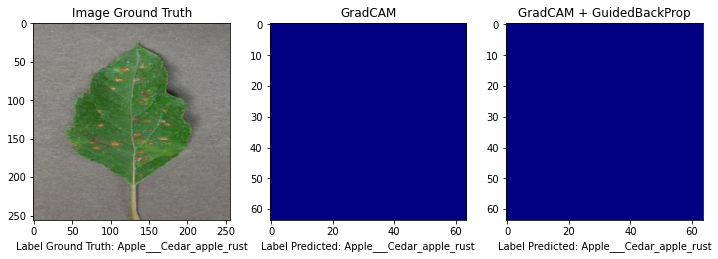

In [ ]:
grad_guided('/content/PlantVillage/train/Apple___Cedar_apple_rust/064b14b5-af1b-4bcf-afe7-a061e5669dbb___FREC_C.Rust 9839.JPG')

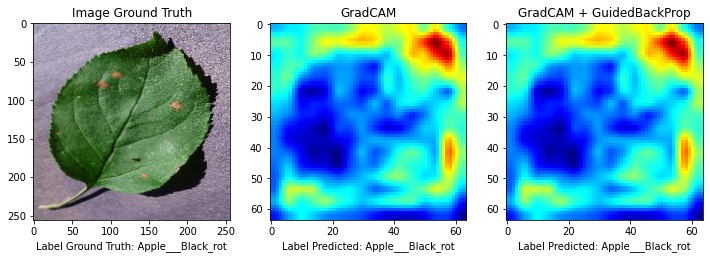

In [ ]:
grad_guided('/content/PlantVillage/train/Apple___Black_rot/02168189-aa75-4284-a7f0-8ca5901ea783___JR_FrgE.S 2948.JPG')

In [ ]:
decoder_un_conv = run_cls('conv', gist_train_unet)
decoder_un_conv.compile(loss='categorical_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
decoder_un_conv.summary()

In [ ]:
er = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_delta=0.0001)
callbacks = [er, lr]
hist1 = decoder_un_conv.fit(gist_train_unet, y_train, batch_size=32, epochs=100, 
                            validation_data = (gist_test_unet, y_test_one_hot),
                            shuffle=True, callbacks=callbacks)